<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=300, height=300></p>

<h3 style="text-align: center;"><b>Phystech School of Applied Mathematics and Informatics (PAMI) MIPT</b></h3>

---

<h3 style="text-align: center;"><b> Gradient descent. Linear models.</b></h3>

In this notebook we are going to implement gradient descent for linear model.

In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import scipy.linalg as sla
import matplotlib.pyplot as plt
from copy import copy
%matplotlib inline

### Model building

Model of our linear model:

In [0]:
# initialize variables
# W - weights of the input attributes
W = None #it is special value which we are using just to be able to reference the variable from code underneath 
# b - bias 
b = None

def mse(preds, y):
    #returns Mean Squared Error of preds and y
    return ((preds - y)**2).mean()

def solve_weights(X, y):
    """
    This procedure solves analytically system of equasions which defines finction corresponds to a minimum of MSE
    """
    # keyword global makes it possible to change global variables 
    # which are defined above
    global W, b
    
    
    N = X.shape[0]
    # making it easier for us and concatinate b and W
    bias = np.ones((N, 1))
    X_b = np.append(bias, X, axis=1)
    
    # implementing formula to solve Ordinary Least Squares problem
    # W_full contains all parameters including b 
    W_full = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    
    # now we are splitting W and b to reassign them
    W = W_full[1:]
    b = np.array([W_full[0]])
    
def grad_descent(X, y, lr, num_iter=100):
    """
    Approximates optimum fucntion with gradient descent method. In this case we do not know for sure, how good 
    approximation is, so we need to return value of MSE loss to measure goodness of the model.
    """
    global W, b
    W = np.random.rand(X.shape[1])
    b = np.array(np.random.rand(1))
    
    losses = []
    
    N = X.shape[0]
    for iter_num in range(num_iter):
        preds = predict(X)
        losses.append(mse(preds, y))
        
        w_grad = np.zeros_like(W)
        b_grad = 0
        for sample, prediction, label in zip(X, preds, y):
            w_grad += 2 * (prediction - label) * sample
            b_grad += 2 * (prediction - label)
            
        W -= lr * w_grad
        b -= lr * b_grad
    return losses

def predict(X):
    """
    If we approximate something it is useful to verify approximation.
    One way to do it is to make predictions, when right answers are known and to compare them.
    This is procedure which makes predictions
    """
    global W, b
    return np.squeeze(X@W + b.reshape(-1, 1))

Let's take a look at gradient descent formulas more carefully:<br>
This is our loss function:
$$L(\hat{y}) = \sum_{i = 1}^{N}( \hat{y}_{i} - y_{i} )^{2}$$
It's derivative:
$$\frac{ dL(\hat{y})}{d\hat{y}} =  \sum_{i = 1}^{N}2(\hat{y}_{i} - y_{i} )$$<br>

Where $\hat{y}$ - prediction vector and $y$ - ground truth vector. If there are only two attributes, that is how it looks:

$$\hat{y}_{i} = W_1 * x_{i1} + W_2 * x_{i2} + b$$


When equation for $\hat{y}$ is put in Loss derivative. Where $i$ is index of the vector and 1 and 2 are numbers of attributes:<br>

$$\frac{\partial L(\hat{y})}{ \partial W_1} = \sum_{i = 1}^{N}\frac{\partial L}{\partial \hat{y}}\times\frac{\partial \hat y}{\partial W_1} = \sum_{i = 1}^{N} \frac{\partial (( \hat{y}_{i} - y_{i} )^{2})}{\partial \hat{y_i}} \times \frac{\partial \hat{y_i}}{\partial W_1}  =  
\sum_{i = 1}^{N} 2 (\hat{y_i} - y) \times x_{i1} $$<br>

### Data generation

In [0]:
# Here we are generating some data to approximate
func = lambda x: (0.34*x+13.7+np.random.normal(0, 7, size=x.shape))
X_train = np.random.random(100) * 150
y_train = func(X_train)

# Let's take a look at it:
pd.DataFrame({'X': X_train, 'Y': y_train}).head()

,X,Y
0,99.026660,43.477936
1,115.018681,50.998821
2,26.243404,16.032440
3,109.791744,41.504954
4,145.297366,74.603875


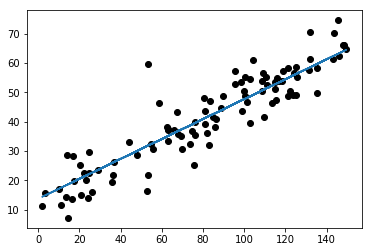

In [0]:
plt.scatter(X_train, y_train, c='black')
plt.plot(X_train, 0.34*X_train+13.7)
plt.show()

### Analytic solution

In [0]:
solve_weights(X_train.reshape(-1, 1), y_train)

In [0]:
W, b

(array([0.35559553]), array([12.45393234]))

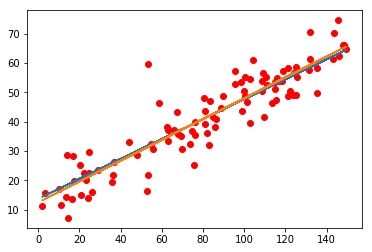

In [0]:
# Let's plot analytic solution and real dependence
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, 0.34*X_train+13.7)
plt.plot(X_train, np.squeeze(X_train.reshape(-1, 1) @ W + b.reshape(-1, 1)))
plt.show()
#May be you can explain why there is a difference?

### Gradient descent solution

In [0]:
#We are collecting losses from each step and plotting them. It will help us to see how our model is doing
losses = grad_descent(X_train.reshape(-1, 1), y_train, 1e-9, 15000)

In [0]:
W, b

(array([0.47362473]), array([0.4091014]))

([<matplotlib.lines.Line2D at 0x111d375c0>], 69.4463869968108)

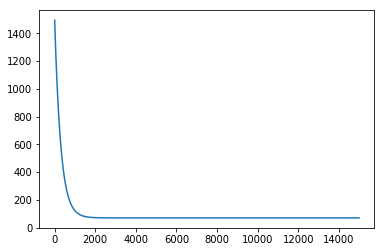

In [0]:
plt.plot(losses), losses[-1]

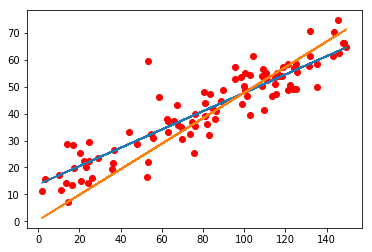

In [0]:
# Plotting real dependence and approximation from gradient descent
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, 0.34*X_train+13.7)
plt.plot(X_train, np.squeeze(X_train.reshape(-1, 1) @ W + b.reshape(-1, 1)))
plt.show()

### Some real data

We are loading some real data with the help of pandas. We will do the same thing as we did with generated data.

In [0]:
df = pd.read_csv("data.csv")

In [0]:
df.head()

,Index,A1,A2,A3,A4,B
0,1,75,91,6,85,4815
1,2,6,48,48,48,234
2,3,5,60,24,40,160
3,4,74,48,8,86,4794
4,5,10,74,70,11,659


In [0]:
# splitting labels and data
data, label = np.array(df)[:, 1:5], np.array(df)[:, 5]

In [0]:
label = (label - label.mean()) / label.std()

### Analytic solution

In [0]:
solve_weights(data, label)

In [0]:
W, b
W_an, b_an = copy(W), copy(b)

In [0]:
mse(predict(data), label)

0.608053802885831

### Gradient descent solution

In [0]:
losses = grad_descent(data, label, 1e-9, 15000)

In [0]:
W, b

(array([ 0.00072532,  0.00044741,  0.00499156, -0.02306739]),
 array([0.96801775]))

([<matplotlib.lines.Line2D at 0x1143d2080>], 1.0929516298150157)

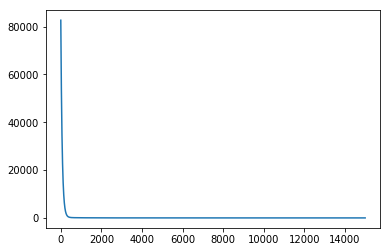

In [0]:
plt.plot(losses), losses[-1]

In [0]:
You can see that now there is no plot of dependence. It is because they are too many dimentions and it can't be plotted properly.<br>
But it is possible to see the MSE not only between ground truth and predictions, but between our result and analytic solution, luckily we have one. 

In [0]:
error = ((W - W_an)**2).mean() + ((b - b_an)**2).mean()
relative_error = error/((W_an**2).mean() + (b_an**2).mean())
print("error :", error)
print("relative error :",relative_error)

error : 2.518105534636845
relative error : 3.755689463992475
